https://sinav30.conagua.gob.mx:8080/Presas/
https://sinav30.conagua.gob.mx:8080/PresasPG/presas/reporte/2023-10-12


In [13]:
import requests
import pandas as pd
import json
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set_style("whitegrid")


In [14]:
def download_data_and_save_to_json(date, output_folder, session):
    #print(date)
    url = f'https://sinav30.conagua.gob.mx:8080/PresasPG/presas/reporte/{date}' 
    json_filename = os.path.join(output_folder, f'data_{date}.json')


    if os.path.exists(json_filename):
        print(f"Datos existentes para la fecha: {date}, no se descargan nuevamente.")
        return
    
    try:
        start_time = time.time()
        response = session.get(url)
        end_time = time.time()
        time_taken = end_time - start_time
        
        if response.status_code == 200:
            response_text = response.content.decode('utf-8')

            response_data = json.loads(response_text)

            df = pd.DataFrame(response_data)

            json_filename = os.path.join(output_folder, f'data_{date}.json')
            df.to_json(json_filename, orient='records')

            print(f"Datos para la fecha: {date} guardados como {json_filename} con un tiempo de solicitud: {time_taken:.2f} segundos")

        else:
            print(f"No se obtuvieron datos para la fecha: {date}. Código: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"Error con la fecha: {date}: {e}")


In [17]:

start_date = datetime(1990, 1, 1)
end_date = datetime.today()

output_folder = 'datos_presas'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

session = requests.Session()

current_date = start_date
while current_date <= end_date:
    download_data_and_save_to_json(current_date.strftime('%Y-%m-%d'), output_folder, session)
    current_date += timedelta(days=1)


Datos para la fecha: 1990-01-01 guardados como datos_presas/data_1990-01-01.json con un tiempo de solicitud: 0.90 segundos
Datos para la fecha: 1990-01-02 guardados como datos_presas/data_1990-01-02.json con un tiempo de solicitud: 0.64 segundos
Datos para la fecha: 1990-01-03 guardados como datos_presas/data_1990-01-03.json con un tiempo de solicitud: 0.62 segundos
Datos para la fecha: 1990-01-04 guardados como datos_presas/data_1990-01-04.json con un tiempo de solicitud: 0.67 segundos
Datos para la fecha: 1990-01-05 guardados como datos_presas/data_1990-01-05.json con un tiempo de solicitud: 0.63 segundos
Datos para la fecha: 1990-01-06 guardados como datos_presas/data_1990-01-06.json con un tiempo de solicitud: 0.67 segundos
Datos para la fecha: 1990-01-07 guardados como datos_presas/data_1990-01-07.json con un tiempo de solicitud: 0.64 segundos
Datos para la fecha: 1990-01-08 guardados como datos_presas/data_1990-01-08.json con un tiempo de solicitud: 0.72 segundos
Datos para la fe

In [18]:
import pandas as pd
import os

def merge_jsons_in_folder(folder_path):
    try:
        files = os.listdir(folder_path)

        json_files = [file for file in files if file.endswith('.json')]
        print(len(json_files))

        if not json_files:
            print("Folder sin JSONs.")
            return None

        merged_df = pd.DataFrame()
 
        dftoconcat = []
        for file_name in json_files:
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_json(file_path)
            dftoconcat.append(df)
            if(len(dftoconcat) % 500 == 0):
                print(len(dftoconcat))


        
        merged_df = pd.concat(dftoconcat, ignore_index=True)
            

        return merged_df

    except Exception as e:
        print(f"No se pudo hacer merge de los JSONs: {e}")
        return None

def save_merged_df_to_json(merged_df, output_file):
    try:
        if merged_df is not None:
            merged_df.to_json(output_file, orient='records')
            print(f"Datos mezclados en: '{output_file}'")

    except Exception as e:
        print(f"Error al guardar todos los datos en un solo JSON: {e}")

def save_merged_df_to_csv(merged_df, output_file):
    try:
        if merged_df is not None:
            merged_df.to_csv(output_file, index=False)
            print(f"Datos mezclados en: '{output_file}'")

    except Exception as e:
        print(f"Error al guardar todos los datos en un solo feather: {e}")

folder_path = 'datos_presas'  
#output_json_file = 'historico.json'  
output_csv_file = 'historico.csv'  
merged_df = merge_jsons_in_folder(folder_path)
#save_merged_df_to_json(merged_df, output_file)
save_merged_df_to_csv(merged_df, output_csv_file)


12341
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
Datos mezclados en: 'historico.csv'


In [19]:
import pandas as pd

#json_file_path = 'historico.json'
csv_file_path = 'historico.csv'

dfHistorico = None
try:
    #dfHistorico = pd.read_json(json_file_path)
    dfHistorico = pd.read_csv(csv_file_path)


except Exception as e:
    print(f"Error al abrir el csv: {e}")


/var/folders/mk/t6y50d7s2ds93t8l2lw18p_00000gn/T/ipykernel_19593/2164830802.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfHistorico = pd.read_csv(csv_file_path)


In [29]:
#dfHistorico.head(10)

dfHistoricoNL = dfHistorico[dfHistorico['estado'] == 'Nuevo León']

columns_of_interest = ['fechamonitoreo', 'clavesih', 'nombreoficial', 'nombrecomun', 'nommunicipio', 'llenano', 'almacenaactual', 'estado']

dfHistoricoNL = dfHistoricoNL.loc[:, columns_of_interest]

dfHistoricoNL['fechamonitoreo'] = pd.to_datetime(dfHistoricoNL['fechamonitoreo'])
dfHistoricoNL = dfHistoricoNL.sort_values(by='fechamonitoreo')
dfHistoricoNL = dfHistoricoNL[dfHistoricoNL['llenano'] <= 2.0]

sufix_to_remove = ', N.L.'

dfHistoricoNL['nombrecomun'] = dfHistoricoNL['nombrecomun'].str.replace(sufix_to_remove, '', regex=False)
dfHistoricoNL['nombrecomun'] = dfHistoricoNL['nombrecomun'] + sufix_to_remove
#replace(prefix_to_remove, '', regex=False)

dfHistoricoNL.head(10)

,fechamonitoreo,clavesih,nombreoficial,nombrecomun,nommunicipio,llenano,almacenaactual,estado
1747386,2007-01-01,CPRNL,"José López Portillo, N.L.","Cerro Prieto, N.L.",Linares,0.539743,161.923,Nuevo León
1747342,2007-01-01,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.860212,30.110,Nuevo León
1747334,2007-01-01,CCHNL,"Cuchillo Solidaridad, N.L.","El Cuchillo, N.L.",China,0.918895,1032.050,Nuevo León
1747328,2007-01-01,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.356636,6.780,Nuevo León
531373,2007-01-02,PSANL,"Salinillas, N.L.","Salinillas, N.L.",Anáhuac,0.356636,6.780,Nuevo León
531381,2007-01-02,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.858784,30.060,Nuevo León
531393,2007-01-02,CPRNL,"José López Portillo, N.L.","Cerro Prieto, N.L.",Linares,0.539733,161.920,Nuevo León
531555,2007-01-02,CCHNL,"Cuchillo Solidaridad, N.L.","El Cuchillo, N.L.",China,0.919927,1033.210,Nuevo León
16650,2007-01-03,CCHNL,"Cuchillo Solidaridad, N.L.","El Cuchillo, N.L.",China,0.919927,1033.210,Nuevo León
16676,2007-01-03,LBCNL,"Rodrigo Gómez, N.L.","La Boca, N.L.",Santiago,0.858784,30.060,Nuevo León


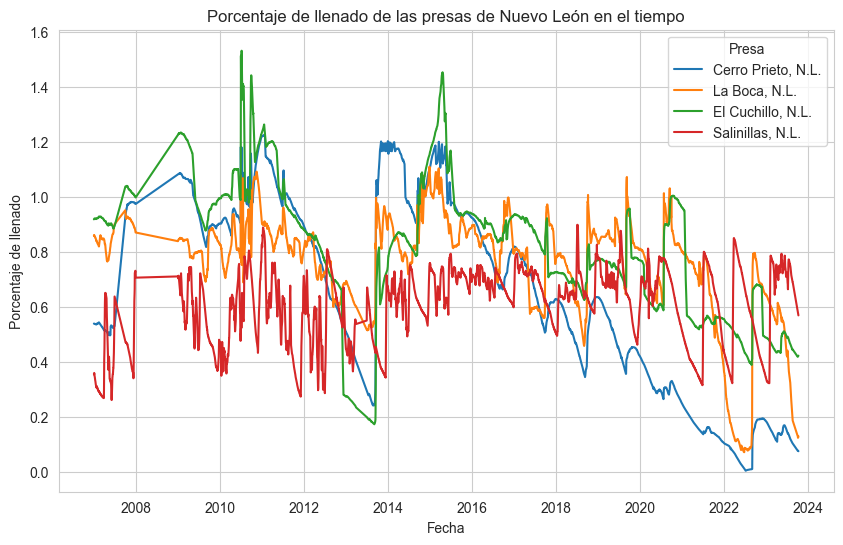

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fechamonitoreo', y='llenano', data=dfHistoricoNL, hue='nombrecomun')
plt.title('Porcentaje de llenado de las presas de Nuevo León en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de llenado')
plt.legend(title='Presa', loc='best')
plt.show()


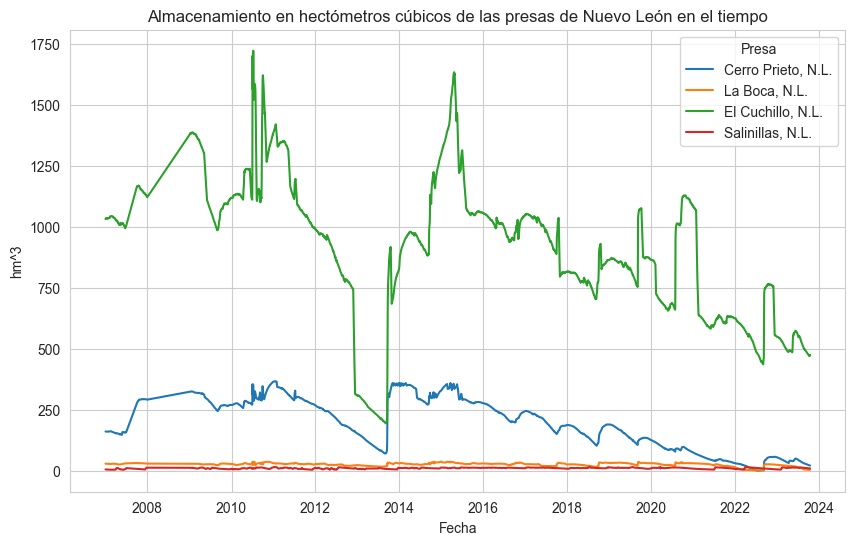

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fechamonitoreo', y='almacenaactual', data=dfHistoricoNL, hue='nombrecomun')
plt.title('Almacenamiento en hectómetros cúbicos de las presas de Nuevo León en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('hm^3')
plt.legend(title='Presa', loc='best')
plt.show()


In [58]:

df2 = dfHistoricoNL

df2= df2.groupby('fechamonitoreo')['almacenaactual'].cumsum()




print(df2.head(10))

'''
plt.figure(figsize=(10, 6))
#plt.plot(dfHistoricoNL['fechamonitoreo'], df2)
sns.lineplot(x=dfHistoricoNL['fechamonitoreo'], y=df2)
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Value Per Date for the Specific Column')

plt.show()
'''


1747386     161.923
1747342     192.033
1747334    1224.083
1747328    1230.863
531373        6.780
531381       36.840
531393      198.760
531555     1231.970
16650      1033.210
16676      1063.270
Name: almacenaactual, dtype: float64


"\nplt.figure(figsize=(10, 6))\n#plt.plot(dfHistoricoNL['fechamonitoreo'], df2)\nsns.lineplot(x=dfHistoricoNL['fechamonitoreo'], y=df2)\nplt.xlabel('Date')\nplt.ylabel('Cumulative Value')\nplt.title('Cumulative Value Per Date for the Specific Column')\n\nplt.show()\n"

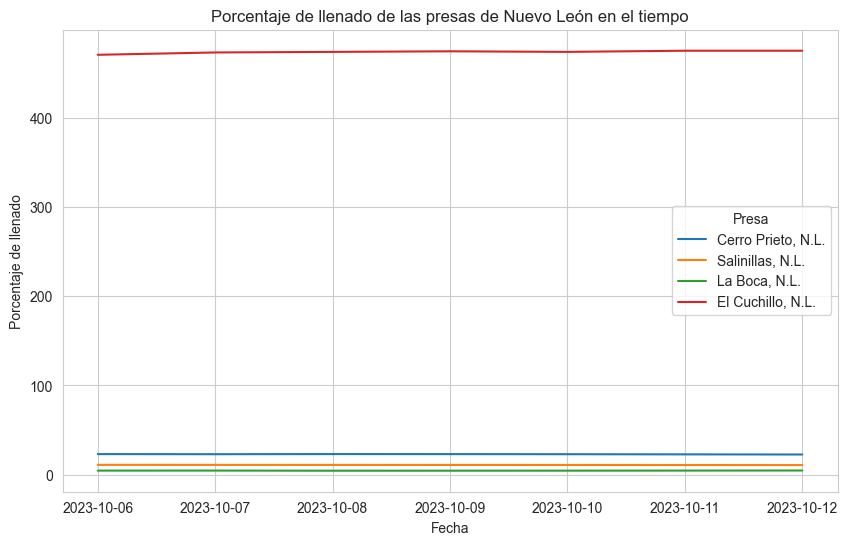

In [27]:
start_date = '2021-06-28'
end_date = '2021-07-01'


start_date = current_date - timedelta(days=10)
end_date = datetime.today()

filtered_df = dfHistoricoNL[(dfHistoricoNL['fechamonitoreo'] >= start_date) & (dfHistoricoNL['fechamonitoreo'] <= end_date)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='fechamonitoreo', y='almacenaactual', data=filtered_df, hue='nombrecomun')
plt.title('Porcentaje de llenado de las presas de Nuevo León en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de llenado')
plt.legend(title='Presa', loc='best')
plt.show()


